In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#导入必要的库

In [311]:
#读取数据，0对应第一支股票，1对应第二只，以此类推
df1=pd.read_excel('data.xlsx',0) 
df1=df1.iloc[0:-100,1:]#去掉最后10天的数据
df1.tail()
df1.replace('--', pd.NA, inplace=True)# 将'--'转换为NaN
df1 = df1.apply(pd.to_numeric, errors='coerce')# 将NaN值用均值替代
df1.fillna(df1.mean(), inplace=True)

In [312]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:,:-1]
y=df['target']#切片是前闭后开[)
print(X.shape)
print(y.shape)

(6835, 10)
(6835,)


In [313]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['goal'])
x=X
cut=100#取最后cut=100天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

67350
1000
6735
100


In [314]:
# 建立bp模型 训练 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam

model = Sequential()  # 层次模型
model.add(Dense(10, input_dim=10, kernel_initializer='uniform'))  # 输入层，Dense表示BP层
model.add(Activation('relu'))  # 添加激活函数
model.add(Dense(4, kernel_initializer='uniform'))  # 中间层
model.add(Activation('sigmoid'))  # 添加激活函数
model.add(Dense(1))  # 输出层
model.compile(loss='mean_squared_error', optimizer='Adam')  # 编译模型
model.fit(X_train, y_train, epochs=50, batch_size=256)  # 训练模型，使用epochs代替nb_epoch

Epoch 1/50
27/27 [==============================] - 1s 4ms/step - loss: 0.2086
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.1339
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0777
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0283
Epoch 6/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0229
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0153
Epoch 10/50
27/27 [==============================] - 0s 6ms/step - loss: 0.0128
Epoch 11/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0105
Epoch 12/50
27/27 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 13/50
27/27 [=============================

In [315]:
model.summary()#模型描述

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 10)                110       
                                                                 
 activation_56 (Activation)  (None, 10)                0         
                                                                 
 dense_85 (Dense)            (None, 4)                 44        
                                                                 
 activation_57 (Activation)  (None, 4)                 0         
                                                                 
 dense_86 (Dense)            (None, 1)                 5         
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


In [316]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
y_train=y_train

211/211 [==============================] - 1s 4ms/step


Text(0.5, 1.0, 'Train Data')

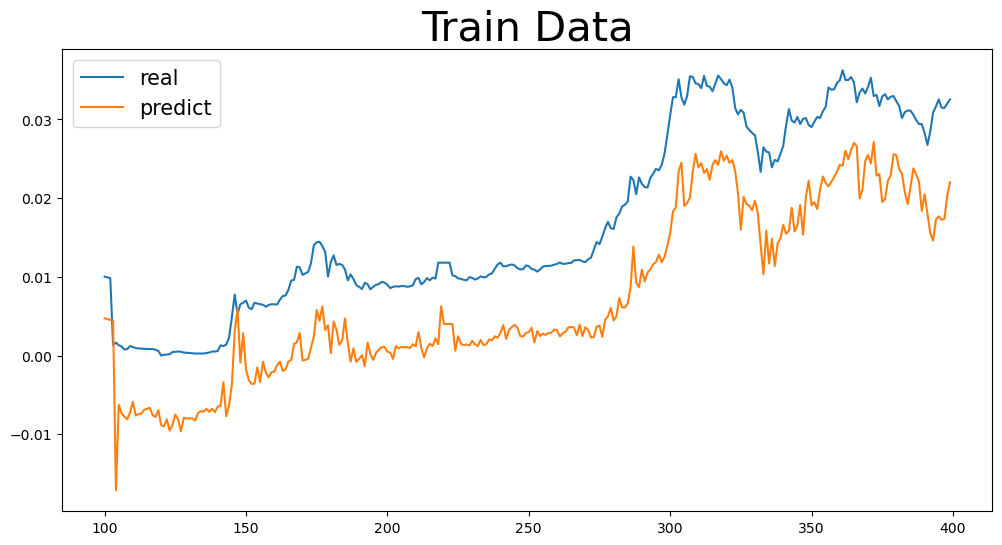

In [317]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [318]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

4/4 [==============================] - 0s 7ms/step


Text(0.5, 1.0, 'Test Data')

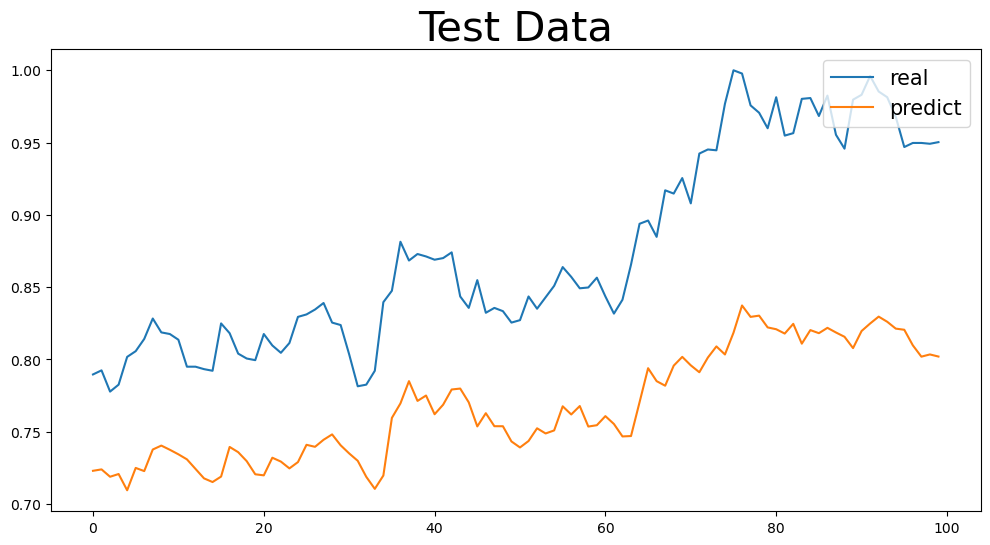

In [319]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [320]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)

print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.010449367944453569
0.00024092305099769843
857.3231599367027
测试集上的MAE/MSE/MAPE
0.10632412294658249
0.012387044610055756
14.45688926556806
预测涨跌正确: 0.5858585858585859


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33632\1084996973.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
